In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as ss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('Employee-turnover.csv')

In [3]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [4]:
df.shape

(1470, 29)

In [5]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [6]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
df['Job Role'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [8]:
df['Job Role'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

In [12]:
mapattrition={
    'Yes':1,
    'No':0
}
satisfy={
    'Low':0,
    'Medium':1,
    'High':2,
    'Very High':3,
}
time={
    'Yes':1,
    'No':0
}
map_work_life_balance={
    'Bad':0,
    'Good':1,
    'Best':2,
    'Better':3,
}

In [13]:
df['attrition_no.']=df['Attrition (Yes/No)'].map(mapattrition)
df['work_lif_balance_no.']=df['Work Life Balance'].map(map_work_life_balance)
df['Job_Satisfaction']=df['Job Satisfaction'].map(satisfy)
df['Over_Time']=df['Over Time'].map(time)


In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()
label5=LabelEncoder()
label6=LabelEncoder()
label7=LabelEncoder()
df['sex']=label.fit_transform(df.Gender)
df['Relationship_Satisfaction']=label2.fit_transform(df['Relationship Satisfaction'])
df['Environment_Satisfaction']=label3.fit_transform(df['Environment Satisfaction'])
df['department']=label4.fit_transform(df['Department'])
df['job_role']=label5.fit_transform(df['Job Role'])
df['education field']=label5.fit_transform(df['Education Field'])
df['job nvolvement']=label5.fit_transform(df['Job Involvement'])

In [15]:
df=df.drop(['Attrition (Yes/No)','Gender','Work Life Balance','Relationship Satisfaction','Environment Satisfaction','Department','Job Role','Marital Status','Business Travel','Job Involvement','Education Field','Education','Job Satisfaction','Over Time'],axis='columns')

In [16]:
df.head()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,work_lif_balance_no.,Job_Satisfaction,Over_Time,sex,Relationship_Satisfaction,Environment_Satisfaction,department,job_role,education field,job nvolvement
0,1,1,41,1,2,5993,11,0,2,8,...,0,3,1,0,1,2,2,7,1,0
1,1,2,49,8,2,5130,23,1,1,10,...,3,1,0,1,3,0,1,6,1,2
2,1,4,37,2,1,2090,15,0,6,7,...,0,2,1,1,2,1,1,2,4,2
3,1,5,33,3,1,2909,11,0,1,8,...,3,2,1,0,0,3,1,6,1,0
4,1,7,27,2,1,3468,12,1,9,6,...,3,1,0,1,3,1,1,2,3,0


<AxesSubplot:xlabel='Years At Company', ylabel='count'>

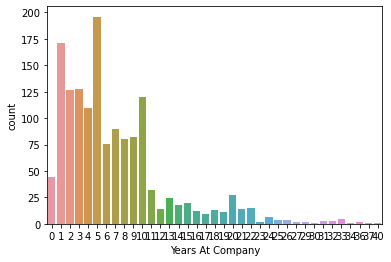

In [17]:
ss.countplot(x=df['Years At Company'],data=df)

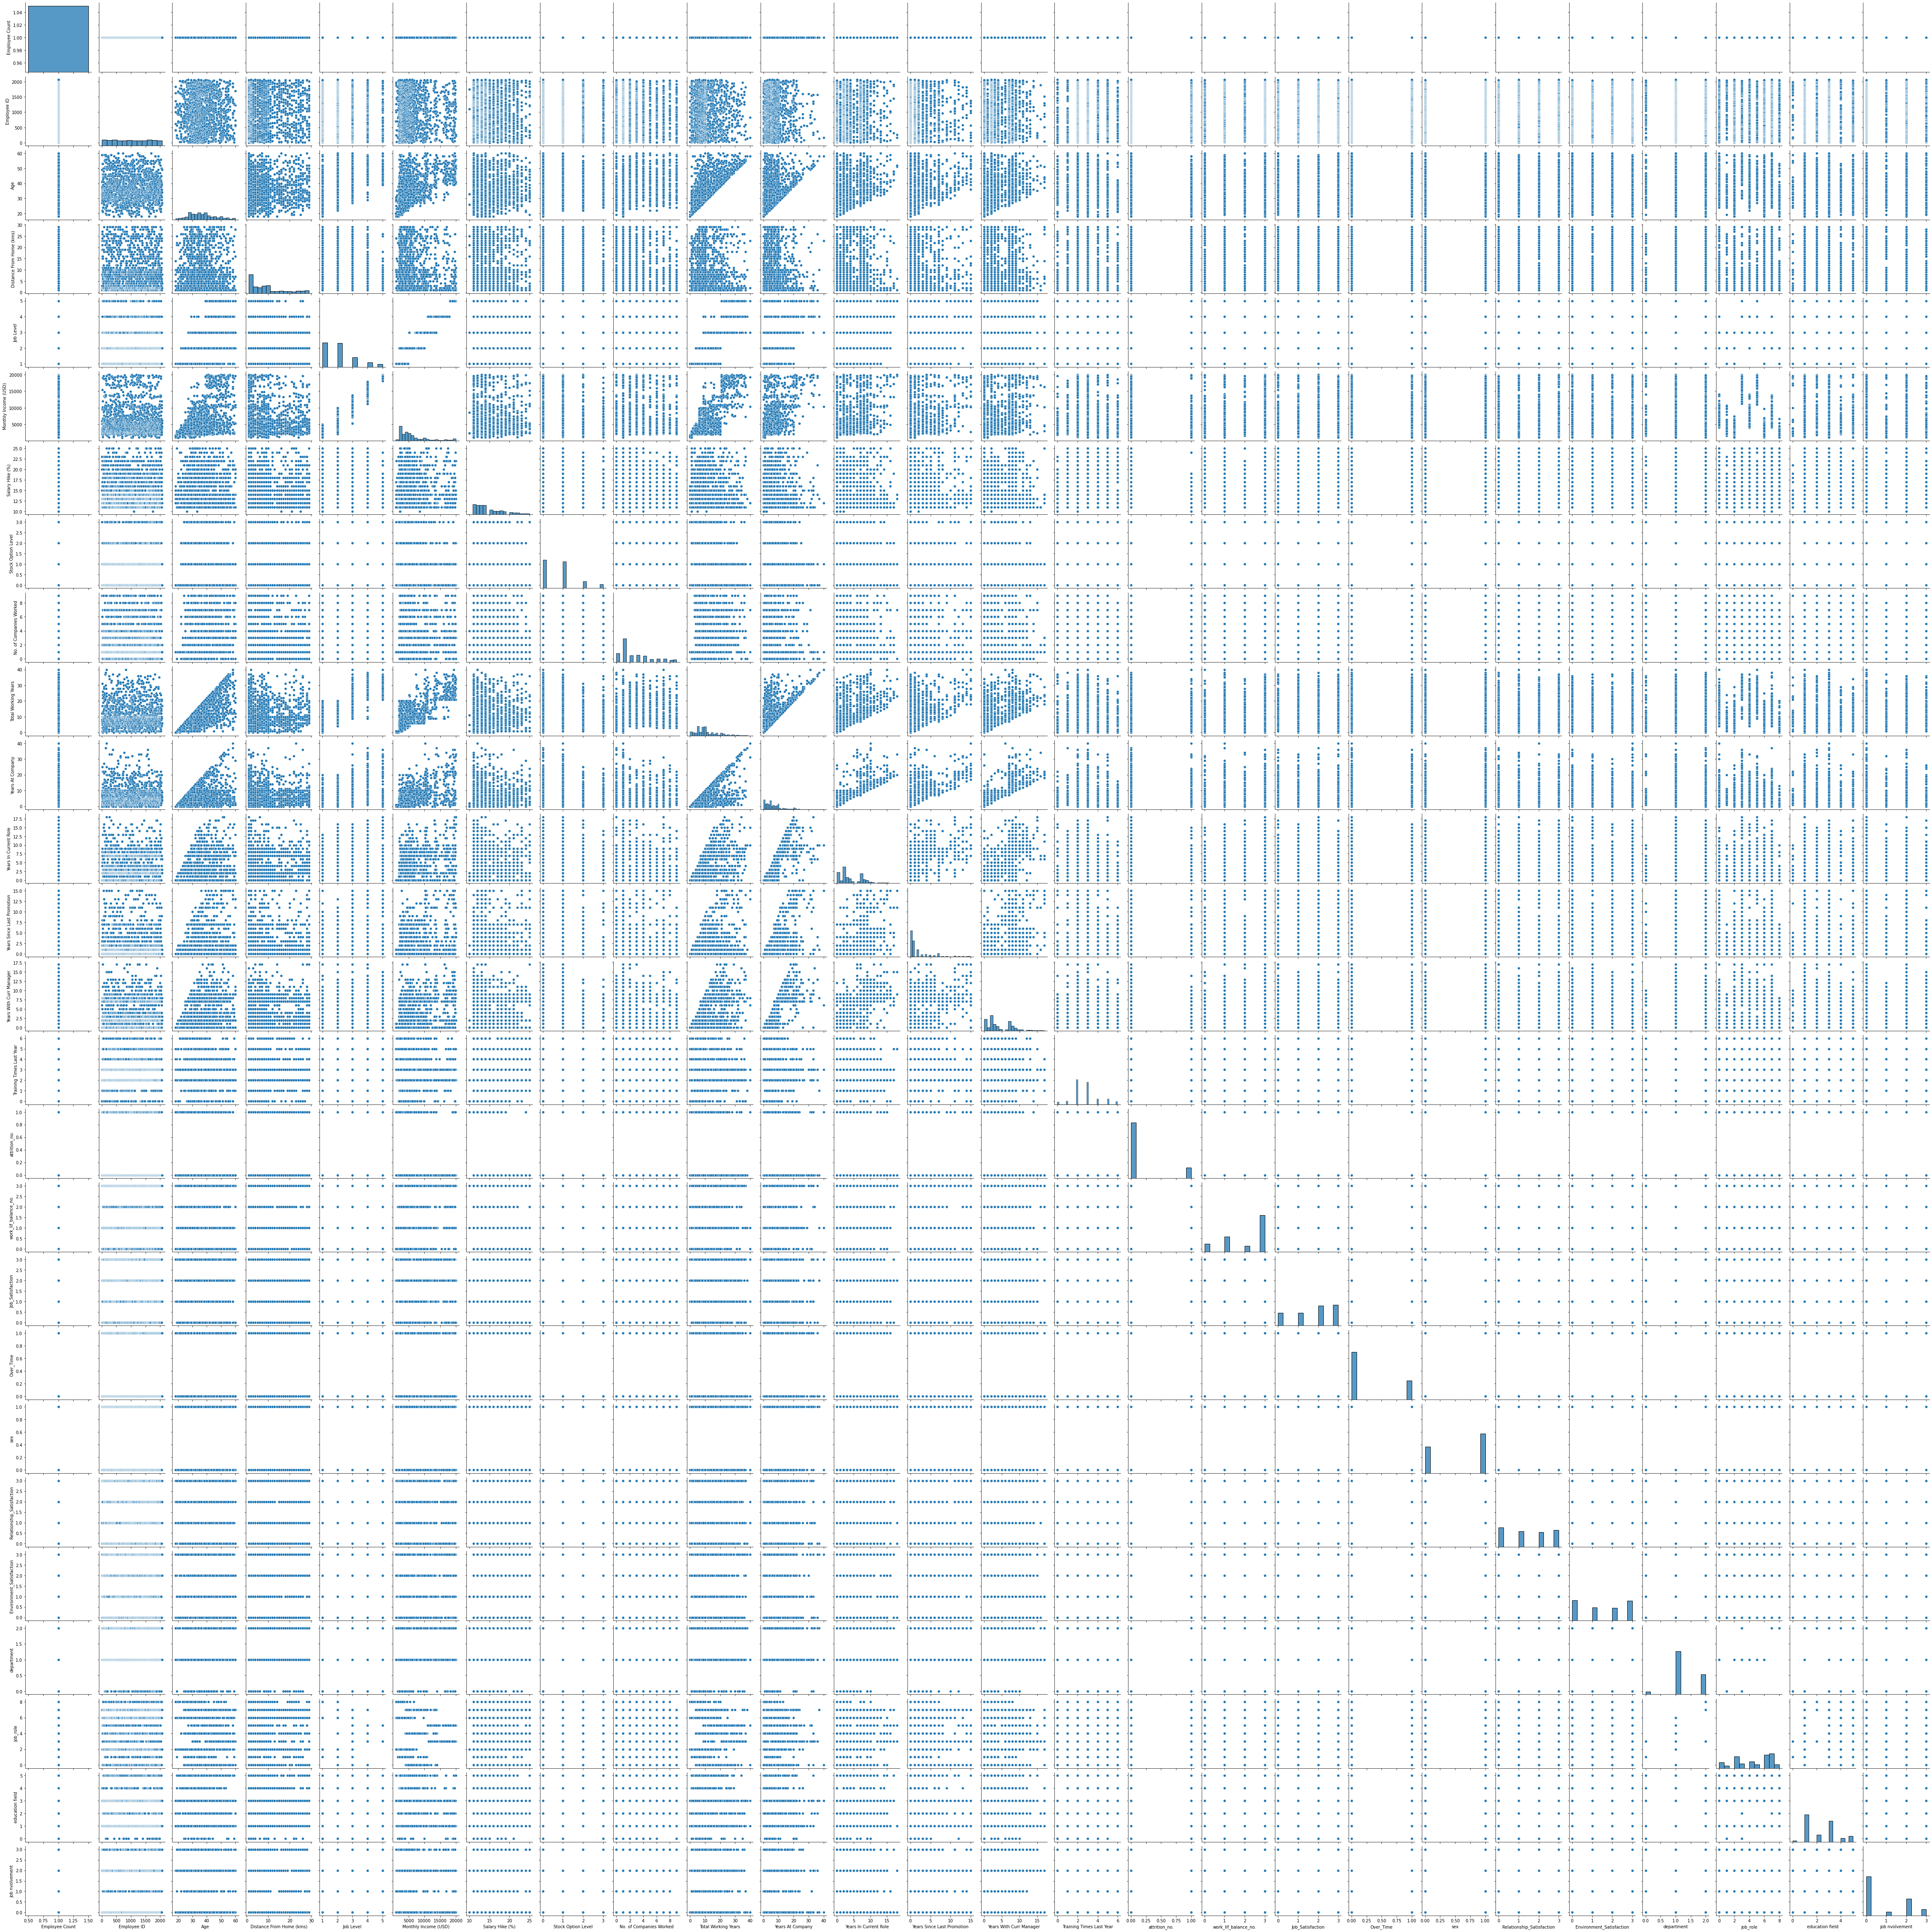

In [18]:
ss.pairplot(df)

In [19]:
import sweetviz as sv
advert_report=sv.analyze(df)
advert_report.show_html('advertising.html')

                                             |                                             | [  0%]   00:00 ->…

Report advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
x=df.drop('attrition_no.',axis='columns')
y=df['attrition_no.']

In [21]:
x

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,...,work_lif_balance_no.,Job_Satisfaction,Over_Time,sex,Relationship_Satisfaction,Environment_Satisfaction,department,job_role,education field,job nvolvement
0,1,1,41,1,2,5993,11,0,2,8,...,0,3,1,0,1,2,2,7,1,0
1,1,2,49,8,2,5130,23,1,1,10,...,3,1,0,1,3,0,1,6,1,2
2,1,4,37,2,1,2090,15,0,6,7,...,0,2,1,1,2,1,1,2,4,2
3,1,5,33,3,1,2909,11,0,1,8,...,3,2,1,0,0,3,1,6,1,0
4,1,7,27,2,1,3468,12,1,9,6,...,3,1,0,1,3,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,36,23,2,2571,17,1,4,17,...,3,3,0,1,0,0,1,2,3,3
1466,1,2062,39,6,3,9991,15,1,4,9,...,3,0,0,1,1,3,1,0,3,2
1467,1,2064,27,4,2,6142,20,1,1,6,...,3,1,1,1,2,2,1,4,1,3
1468,1,2065,49,2,2,5390,14,0,2,17,...,1,1,0,1,3,3,2,7,3,2


In [22]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition_no., Length: 1470, dtype: int64

In [23]:
svc=cross_val_score(SVC(),x,y,cv=5).mean()
svc

0.8387755102040817

In [24]:
random=cross_val_score(RandomForestClassifier(),x,y,cv=5).mean()
random

0.9027210884353742

In [25]:
tree=cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()
tree

0.8401360544217689

In [26]:
logistic_regression=cross_val_score(LogisticRegression(),x,y,cv=5).mean()
logistic_regression

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.8564625850340135

In [27]:
df['attrition_no.'].value_counts()

0    1233
1     237
Name: attrition_no., dtype: int64

In [35]:
knn=cross_val_score(KNeighborsClassifier(n_neighbors=6),x,y,cv=5)
knn

array([0.82653061, 0.84353741, 0.83673469, 0.83673469, 0.84013605])

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [101]:
#since random forest classifier gives more accuracy so we will use this
randomforest=RandomForestClassifier(n_estimators=19)
randomforest.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=19)

In [102]:
y_predict=randomforest.predict(xtest)

In [103]:
report=accuracy_score(y_predict,ytest)
print(report)

0.891156462585034
